In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
from math import *
import numpy as np
import random

# 1 - The Ruspini dataset

- Question 1

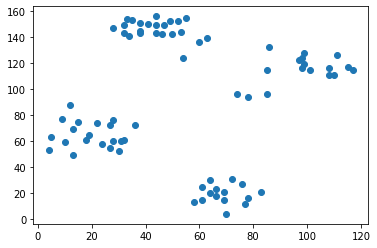

In [154]:
data = pd.read_csv('ruspini.csv')
plt.scatter(data.x,data.y)

# 2- K-means algorithm

- Question 2

In [155]:
class mykmeans:

    def __init__(self, **kwargs):
        
        self.nCluster = 8 
        self.maxIter = 10 
        self.tol = 1e-4
        self.centroids = []
        self.data = {}

        for key,value in kwargs.items():
            if key == 'nCluster':
                self.nCluster = value
            if key == 'maxIter':
                self.maxIter = value
            if key == 'tol':
                self.tol = value
            elif(key != 'nCluster' and key != 'maxIter' and key != 'tol'):
                print("unknown parameter")
                break

    def euclidianDist(self,X,Y):
        return math.sqrt((X[0]-Y[0])**2+(X[1]-Y[1])**2)

    def fit(self,dataList):
        self.centroids = random.sample(dataList, self.nCluster)
        rep = 1
        while(rep<=self.maxIter):
            rep += 1
            oldCentroids = self.centroids
            for dataPoint in dataList:
                dist = math.inf
                dataCentroid = (0,0)
                for centroid in self.centroids:
                    if (dist > self.euclidianDist(dataPoint,centroid)):
                        dist = self.euclidianDist(dataPoint,centroid)
                        dataCentroid = centroid
                self.data[dataPoint] = dataCentroid

            #print(self.centroids, '1')
            #Now we compute the new centroids
            if(rep<self.maxIter):
                ind = 0
                for centroid in self.centroids:
                    newcentroid = centroid
                    number = 1
                    for dataPoint in dataList:
                        if self.data[dataPoint] == centroid:
                            newcentroid = (newcentroid[0]+dataPoint[0], newcentroid[1]+dataPoint[1])
                            number += 1 
                    self.centroids[ind] = (newcentroid[0]/number,newcentroid[1]/number)	
                    ind += 1
            #Now we check if the tolerance is satisfied
            toleranceSatisfied = 0
            for i in range(len(oldCentroids)):
                if self.euclidianDist(oldCentroids[i],self.centroids[i])<self.tol:
                    toleranceSatisfied += 1
            #If the tolerance is satisfied for all the centroids we can get out of the loop
            #if toleranceSatisfied == len(self.centroids):
                #break

    def setOfclusterId(self):
        setOfcluster = {}
        Id = 1
        #print(self.data)
        #print(self.centroids, 'haha')
        for centroid in self.centroids:
            setOfcluster[Id] = []
            for dataPoint in self.data:
                if self.data[dataPoint] == centroid:
                    setOfcluster[Id].append(dataPoint)
            Id += 1
        return setOfcluster

    def setOfCentroids(self):
        return self.centroids


In [156]:
mydata = list(zip(data.x, data.y))

In [157]:
g = mykmeans(nCluster = 4, maxIter = 1, tol = 1e-4)
g.fit(mydata)
centroids = g.setOfCentroids()

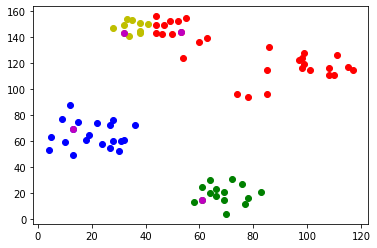

In [158]:
for i in g.setOfclusterId()[1]:
    plt.scatter(i[0],i[1], color='b')
for j in g.setOfclusterId()[2]:
    plt.scatter(j[0],j[1], color='r') 
for k in g.setOfclusterId()[3]:
    plt.scatter(k[0],k[1], color='y')
for k in g.setOfclusterId()[4]:
    plt.scatter(k[0],k[1], color='g') 
for k in centroids:
    plt.scatter(k[0],k[1], color='m')  

- Question 3

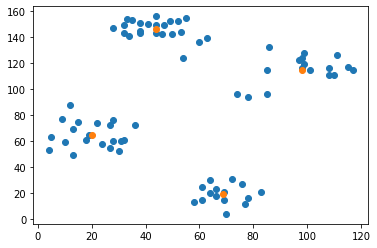

In [172]:
from sklearn.cluster import KMeans
X = data[['x','y']].values
kmeans = KMeans(n_clusters=4, random_state=0, init='random', n_init=1).fit(X)
plt.scatter(data.x,data.y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

- Question 4

The kmeans algorithm of scikit learn fits better to the data when we increase the number of random initialization

- Question 5

In [221]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster,init='random').fit(X)
    silhouette_avg = silhouette_score(X,kmeans.labels_)
    score.append(silhouette_score(X,kmeans.labels_))
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.5827
Silhouette Score for 3 Clusters: 0.6327
Silhouette Score for 4 Clusters: 0.7377
Silhouette Score for 5 Clusters: 0.7019
Silhouette Score for 6 Clusters: 0.5940
Silhouette Score for 7 Clusters: 0.4736
Silhouette Score for 8 Clusters: 0.4688


# 3 - DBSCAN

- Question 6

In [238]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [259]:
scaled_X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=.5, min_samples=5).fit(scaled_X)
#db.labels_
# Number of clusters in labels, ignoring noise if present.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of cluster is : ', n_clusters_)
n_noise_ = list(labels).count(-1)
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X, labels))

The number of cluster is :  4
Silhouette Coefficient: 0.649


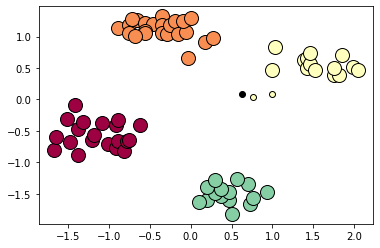

In [257]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scaled_X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scaled_X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


# 4 - The IRIS Dataset

- Question 7

In [263]:
from sklearn import datasets
iris = datasets.load_iris()
iris_X,iris_y = iris['data'], iris['target']

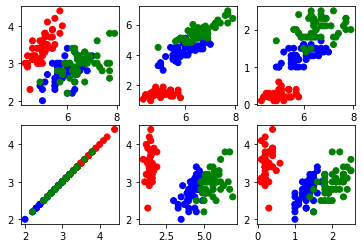

In [298]:
data = pd.DataFrame(iris_X)
data['label'] = pd.Series(iris_y)
fig, ax = plt.subplots(2,3)
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}
ax[0][0].scatter(data[0], data[1], c=data['label'].apply(lambda x: colors[x]))
ax[0][1].scatter(data[0], data[2], c=data['label'].apply(lambda x: colors[x]))
ax[0][2].scatter(data[0], data[3], c=data['label'].apply(lambda x: colors[x]))
ax[1][0].scatter(data[1], data[1], c=data['label'].apply(lambda x: colors[x]))
ax[1][1].scatter(data[2], data[1], c=data['label'].apply(lambda x: colors[x]))
ax[1][2].scatter(data[3], data[1], c=data['label'].apply(lambda x: colors[x]))

- Question 8

In [302]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster,init='k-means++').fit(iris_X)
    silhouette_avg = silhouette_score(iris_X,kmeans.labels_)
    score.append(silhouette_score(iris_X,kmeans.labels_))
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.6810
Silhouette Score for 3 Clusters: 0.5528
Silhouette Score for 4 Clusters: 0.4981
Silhouette Score for 5 Clusters: 0.4887
Silhouette Score for 6 Clusters: 0.3678
Silhouette Score for 7 Clusters: 0.3543
Silhouette Score for 8 Clusters: 0.3501
Silhouette Score for 9 Clusters: 0.3390
Silhouette Score for 10 Clusters: 0.3218
